# Exploratory Data Analysis

class_labels_indices.csv records the labels corresponding to the music examples. Organize comments on all related text content of the music. The same is true for the ArtEmis dataset, collate all text content with emotion (already collated at datasets_fusion.ipynb) into a new CSV file.

These files will be used for EDA exploratory analysis of the text content.

In [ ]:
import pandas as pd

# 读取包含标签ID和标签名的CSV文件
labels_df = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\class_labels_indices.csv")

# 读取包含标签ID的另一个CSV文件
data_df = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\musiccaps-public.csv")

# 创建一个空的列表，用于存储每行的标签名
tag_names = []

# 遍历data_df中的每一行
for index, row in data_df.iterrows():
    # 获取当前行中的标签ID
    tag_ids = row['audioset_positive_labels'].split(',')  # 假设标签ID以逗号分隔
    # 根据标签ID在labels_df中查找对应的标签名，并组合成字符串
    names = ','.join(labels_df[labels_df['mid'].isin(tag_ids)]['display_name'].tolist())
    # 将标签名添加到列表中
    tag_names.append(names)

# 将标签名列表作为新的一列添加到data_df中
data_df['audioset_label'] = tag_names

# 保存更新后的数据框为新的CSV文件
data_df.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\audio_data_with_labels.csv", index=False)


In [ ]:
labels_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\audio_data_with_labels.csv")
pdata = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\processed_audio_data2.csv")

new_col = labels_data['audioset_label']
pdata['audioset_label'] = new_col

pdata.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\processed_audio_data3.csv",index=False)

In [ ]:
# 读取包含两列情感词汇的CSV文件
df = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\processed_artwork_data.csv")

df['emotional_words'].fillna("", inplace=True)

# 合并两列情感词汇
df['painting_emotion'] = df['emotion'].replace('something else', '') + ',' + df['emotional_words']

# 删除多余的逗号
df['painting_emotion'] = df['painting_emotion'].str.strip(',')

# 保存更新后的数据框为新的CSV文件
df.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\processed_artwork_data2.csv", index=False)


In [ ]:
artwork_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\dataset\\processed_artwork_data2.csv", encoding='ISO-8859-1')

# 对数据按照画作进行分组
grouped_data = artwork_data.groupby('painting')

# 存储每幅画作的主题词列表
painting_topics = []

# 遍历每个分组（每幅画）
for name, group in grouped_data:
    # 分词处理
    texts = group['utterance'].apply(text_preprocess).tolist()

    # 构建词典
    dictionary = corpora.Dictionary(texts)

    # 提取每个评论的词袋表示
    corpus = [dictionary.doc2bow(text) for text in texts]

    # 训练LDA模型
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10, eta=0.01)

    # 提取每个主题的关键词
    topic_words = []
    for topic_id in range(lda_model.num_topics):
        topic_words.extend([word for word, _ in lda_model.show_topic(topic_id)])

    # 将主题词列表添加到结果中
    painting_topics.append({'painting': name, 'main_topic_words': ', '.join(topic_words)})

# 转换为DataFrame并显示在控制台上
result_df = pd.DataFrame(painting_topics)
result_df.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\painting2.csv")


In [ ]:
df = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\painting2.csv")

# 定义函数去除重复词汇
def remove_duplicates(text):
    # 将逗号分割的词汇字符串转换为列表，并去除重复词汇
    unique_words = list(set(text.split(',')))
    # 将去重后的词汇列表连接成字符串，用逗号分隔
    return ','.join(unique_words)

# 对词汇列应用去重函数
df['main_topic_words'] = df['main_topic_words'].apply(remove_duplicates)

# 将更新后的数据保存到新的CSV文件中
df.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\painting3.csv", index=False)

In [ ]:
# Group the data by painting
grouped_data = artwork_data.groupby('painting')

# Store the main topic words for each painting
painting_topics = []

# Iterate through each group (each painting)
for name, group in grouped_data:
    # Preprocess the text
    texts = group['utterance'].apply(text_preprocess).tolist()

    # Build the dictionary
    dictionary = corpora.Dictionary(texts)

    # Extract the bag-of-words representation for each comment
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

    # Extract the key words for each topic
    topic_words = []
    for topic_id in range(lda_model.num_topics):
        topic_words.extend([word for word, _ in lda_model.show_topic(topic_id)])

    # Add the topic word list to the result
    painting_topics.append({'painting': name, 'main_topic_words': ', '.join(topic_words)})

# Convert to DataFrame and display in the console
result_df = pd.DataFrame(painting_topics)
result_df.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\processed_artwork_data2.csv")


## Sentiment Analysis and Topic Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import seaborn as sns
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

In [ ]:
# load the data
audio_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\dataset\\processed_audio_data3.csv")
artwork_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\dataset\\processed_artwork_data2.csv", encoding='ISO-8859-1')
painting_topic = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\dataset\\painting3.csv")

## Overview

In [ ]:
audio_data

,audio_name,caption,emotional_words,topic_words,audioset_label
0,-0SdAVK79lg_30-40,This song features an electric guitar as the m...,NaN,"['guitar song', 'piano backing', 'simple percu...","Music,Theme music,Christmas music"
1,-0vPFx-wRRI_30-40,a male voice is singing a melody with changing...,NaN,"['amateur recording', 'finger snipping', 'male...","Music,Musical instrument,Plucked string instru..."
2,-0xzrMun0Rs_30-40,This song contains digital drums playing a sim...,"trumpet, snare, pan, loud, top","['backing track', 'jazzy', 'digital drums', 'p...","Finger snapping,Music"
3,-3Kv4fdm7Uk_30-40,someone is playing a high pitched melody on a ...,poor,"['steeldrum', 'higher register', 'amateur reco...","Stomach rumble,Music"
4,-4NLarMj4xU_30-40,The Pop song features a soft female vocal sing...,"soft, lead, sad, passionate","['pop', 'tinny wide hi hats', 'mellow piano me...","Music,Traditional music"
...,...,...,...,...,...
4712,zw5dkiklbhE_15-25,This audio contains someone playing a wooden b...,NaN,"['amateur recording', 'percussion', 'wooden bo...","Music,Musical instrument,Plucked string instru..."
4713,zwfo7wnXdjs_30-40,The song is an instrumental. The song is mediu...,"poor, harmony, instrumental","['instrumental music', 'arabic music', 'genera...","Wind instrument, woodwind instrument,Shofar"
4714,zx_vcwOsDO4_50-60,The rock music is purely instrumental and feat...,"distortion, good, instrumental","['instrumental', 'no voice', 'electric guitar'...","Music,Rock music,Grunge,Pulse"
4715,zyXa2tdBTGc_30-40,The song is an instrumental. The song is slow ...,"slow, strong, steady, harmony, instrumental","['instrumental music', 'gospel music', 'strong...","Music,Rock music,Grunge,Progressive rock"


In [ ]:
artwork_data

,art_style,painting,utterance,painting_emotion
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"She seems very happy in the picture, and you w...","happy, smile"
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,This woman has really knotty hands which makes...,sadness
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"When looking at this woman, I am filled with c...",emotionless
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"A woman looking at ease, peaceful, and satisfi...","contentment,ease, satisfy, peaceful"
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,She looks like a lady from that past that migh...,"awe,hard, tired"
...,...,...,...,...
443657,Cubism,willi-baumeister_machine-man-with-spiral-turn-...,The interlocking mechanical shapes fitting tog...,creative
443658,Cubism,gino-severini_a-dancer-1,the collection and collage of different colors...,"awe,beautiful"
443659,Romanticism,ivan-aivazovsky_sea-at-night-1861,The peaceful reflections of the moonlight on t...,"awe,sharply, peaceful"
443660,Romanticism,ivan-aivazovsky_sea-at-night-1861,I can imagine the sailors resting this peacefu...,"excitement,peaceful"


In [ ]:
painting_topic

,painting,main_topic_words
0,a.y.-jackson_algoma-in-november-1935,"beautiful, scary, bad, dark, come, wide,looks..."
1,a.y.-jackson_barns-1926,"snow, scenery, perfection, soft, place, night..."
2,a.y.-jackson_early-spring-quebec-1923,"orange, house, atop, place, winter, scene, co..."
3,a.y.-jackson_entrance-to-halifax-harbour-1919,"slowly, round, village, town, simpler, scene,..."
4,a.y.-jackson_first-snow-algoma-country-1920,"falls, destroy, burn,everything, sadness, whi..."
...,...,...
78145,zinaida-serebriakova_work-from-collioure-1930,"muscles, show, color, cheeks, man, lunch, hot..."
78146,zinaida-serebriakova_yevgeny-lanceray-in-a-sha...,"man,'s, skin, secret, light, androgynous, eye..."
78147,zinaida-serebriakova_young-breton-1934,"realistic, finished, skin, technique, natural..."
78148,zinaida-serebriakova_young-girl,"house, front, chores, next, farm, picture, bi..."


### NULL Values

In [ ]:
print('artwork data info: \n', artwork_data.isnull().sum())
print('audio data info: \n', audio_data.isnull().sum())
print('painting topic data info: \n', painting_topic.isnull().sum())

artwork data info: 
 art_style               0
painting                0
utterance               0
painting_emotion    12849
dtype: int64
audio data info: 
 audio_name           0
caption              0
emotional_words    414
topic_words          0
audioset_label       0
dtype: int64
painting topic data info: 
 painting            0
main_topic_words    0
dtype: int64


#### Fill NULL Values

In [ ]:
artwork_data.fillna("neutral", inplace=True)
# 保存更新后的数据框为新的CSV文件
artwork_data.to_csv("processed_artwork_data.csv", index=False)

audio_data.fillna("neutral", inplace=True)
# 保存更新后的数据框为新的CSV文件
audio_data.to_csv("processed_audio_data.csv", index=False)

## Visualization

### Sentiment Analysis

#### Audio Dataset

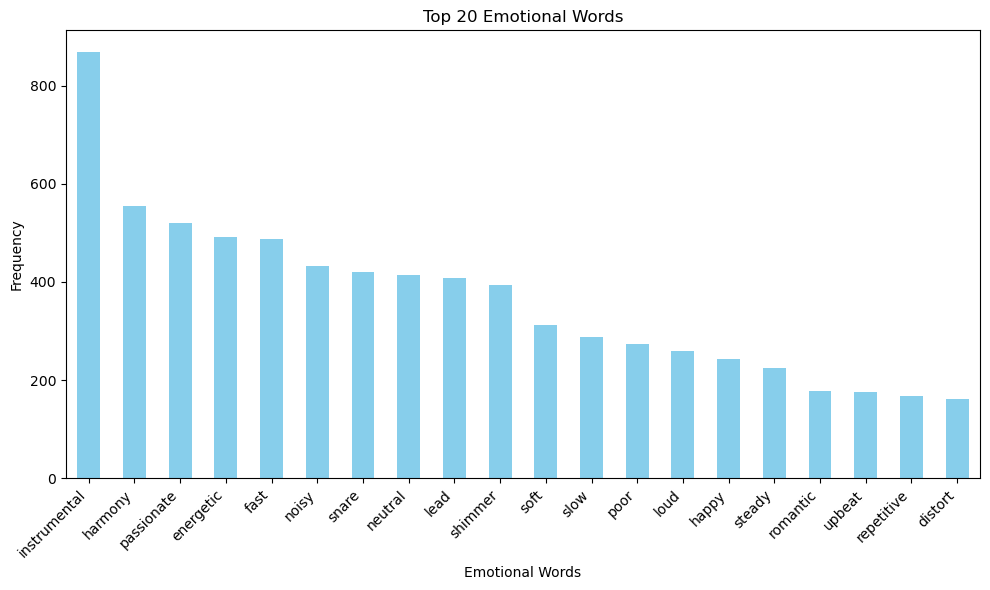

In [ ]:
all_words = ','.join(audio_data['emotional_words'].dropna())  # 合并所有情感词汇并用逗号连接
all_words_list = all_words.split(',')  # 将字符串拆分成单词列表

all_words_list = [word.strip() for word in all_words_list]
word_counts = pd.Series(all_words_list).value_counts()

# 4. 可视化分析
plt.figure(figsize=(10, 6))
word_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Emotional Words')
plt.xlabel('Emotional Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

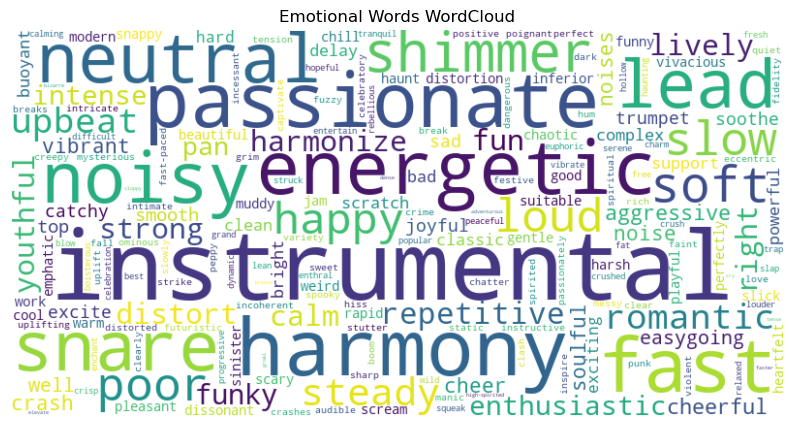

In [ ]:
all_words = ','.join(audio_data['emotional_words'].dropna())  # 合并所有情感词汇并用逗号连接
all_words_list = all_words.split(',')  # 将字符串拆分成单词列表

# 对每个单词进行首尾空格处理
all_words_list = [word.strip() for word in all_words_list]

# 使用 Counter 统计词频
word_counts = Counter(all_words_list)

# 4. 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 5. 可视化分析
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Emotional Words WordCloud')
plt.axis('off')
plt.show()

D:\downloadSoftware\Anaconda3\download\envs\pyTorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\downloadSoftware\Anaconda3\download\envs\pyTorch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


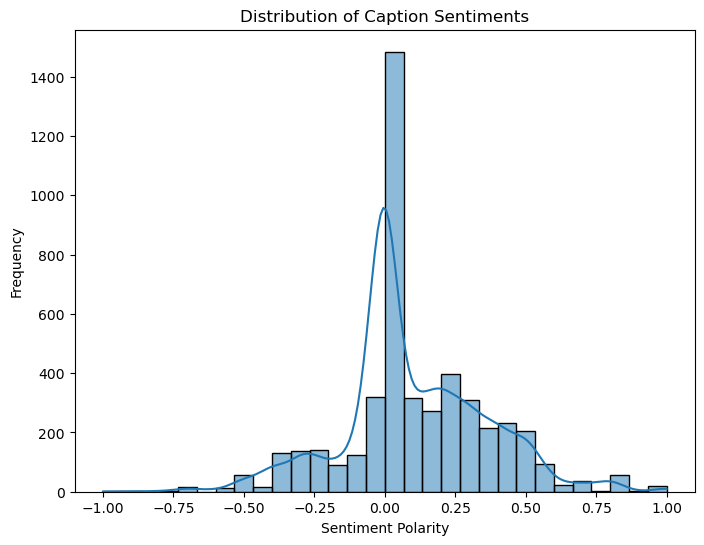

In [ ]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

audio_data['Sentiment'] = audio_data['emotional_words'].apply(sentiment_analysis)
plt.figure(figsize=(8, 6))
sns.histplot(audio_data['Sentiment'], bins=30, kde=True)
plt.title("Distribution of Caption Sentiments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

#### Sentimental Score

In [ ]:
# 加载情感词汇词典
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiment_analysis(text):
    """
    对文本进行情感分析
    参数：
        text (str)：待分析的文本
    返回值：
        sentiment_score (float)：情感得分，范围从 -1（消极）到 1（积极）
    """
    # 分词
    words = word_tokenize(text.lower())

    # 统计文本中积极情感词、消极情感词和中立词的数量
    num_positive_words = sum(1 for word in words if word in positive_words)
    num_negative_words = sum(1 for word in words if word in negative_words)
    num_neutral_words = len(words) - num_positive_words - num_negative_words

    # 计算情感得分
    total_words = num_positive_words + num_negative_words + num_neutral_words
    sentiment_score = ((num_positive_words - num_negative_words) + num_neutral_words * 0.5) / max(1, total_words)

    return sentiment_score

# 对每一行的文本数据应用情感分析函数
audio_data['sentiment_score'] = audio_data['emotional_words'].apply(lambda x: sentiment_analysis(x))

audio_data.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\processed_audio_data4.csv",index=False)

In [ ]:
audio_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\archive\\processed_audio_data4.csv")
audio_data

,audio_name,caption,emotional_words,topic_words,audioset_label,sentiment_score
0,-0SdAVK79lg_30-40,This song features an electric guitar as the m...,neutral,"['guitar song', 'piano backing', 'simple percu...","Music,Theme music,Christmas music",0.500000
1,-0vPFx-wRRI_30-40,a male voice is singing a melody with changing...,neutral,"['amateur recording', 'finger snipping', 'male...","Music,Musical instrument,Plucked string instru...",0.500000
2,-0xzrMun0Rs_30-40,This song contains digital drums playing a sim...,"trumpet, snare, pan, loud, top","['backing track', 'jazzy', 'digital drums', 'p...","Finger snapping,Music",0.111111
3,-3Kv4fdm7Uk_30-40,someone is playing a high pitched melody on a ...,poor,"['steeldrum', 'higher register', 'amateur reco...","Stomach rumble,Music",-1.000000
4,-4NLarMj4xU_30-40,The Pop song features a soft female vocal sing...,"soft, lead, sad, passionate","['pop', 'tinny wide hi hats', 'mellow piano me...","Music,Traditional music",0.500000
...,...,...,...,...,...,...
4712,zw5dkiklbhE_15-25,This audio contains someone playing a wooden b...,neutral,"['amateur recording', 'percussion', 'wooden bo...","Music,Musical instrument,Plucked string instru...",0.500000
4713,zwfo7wnXdjs_30-40,The song is an instrumental. The song is mediu...,"poor, harmony, instrumental","['instrumental music', 'arabic music', 'genera...","Wind instrument, woodwind instrument,Shofar",0.400000
4714,zx_vcwOsDO4_50-60,The rock music is purely instrumental and feat...,"distortion, good, instrumental","['instrumental', 'no voice', 'electric guitar'...","Music,Rock music,Grunge,Pulse",0.400000
4715,zyXa2tdBTGc_30-40,The song is an instrumental. The song is slow ...,"slow, strong, steady, harmony, instrumental","['instrumental music', 'gospel music', 'strong...","Music,Rock music,Grunge,Progressive rock",0.555556


#### Artwork Dataset

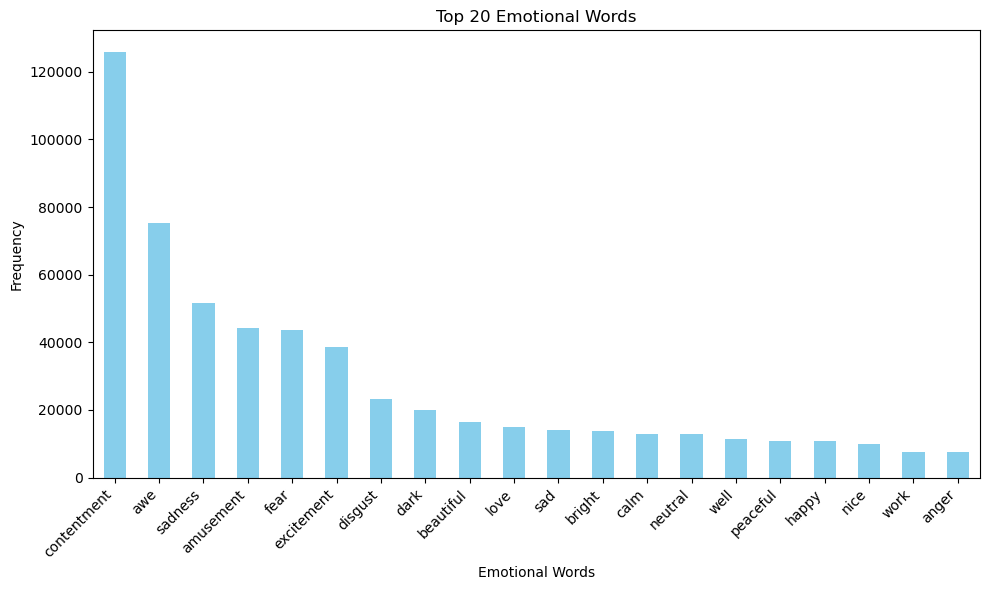

In [ ]:
all_words = ','.join(artwork_data['painting_emotion'].dropna())  # 合并所有情感词汇并用逗号连接
all_words_list = all_words.split(',')  # 将字符串拆分成单词列表

all_words_list = [word.strip() for word in all_words_list]
word_counts = pd.Series(all_words_list).value_counts()

# 4. 可视化分析
plt.figure(figsize=(10, 6))
word_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Emotional Words')
plt.xlabel('Emotional Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

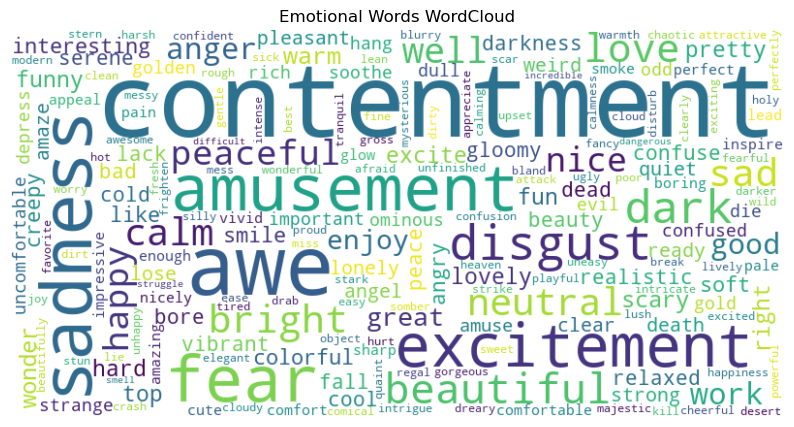

In [ ]:
all_words = ','.join(artwork_data['painting_emotion'].dropna())  # 合并所有情感词汇并用逗号连接
all_words_list = all_words.split(',')  # 将字符串拆分成单词列表

# 对每个单词进行首尾空格处理
all_words_list = [word.strip() for word in all_words_list]

# 使用 Counter 统计词频
word_counts = Counter(all_words_list)

# 4. 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 5. 可视化分析
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Emotional Words WordCloud')
plt.axis('off')
plt.show()

D:\downloadSoftware\Anaconda3\download\envs\pyTorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\downloadSoftware\Anaconda3\download\envs\pyTorch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


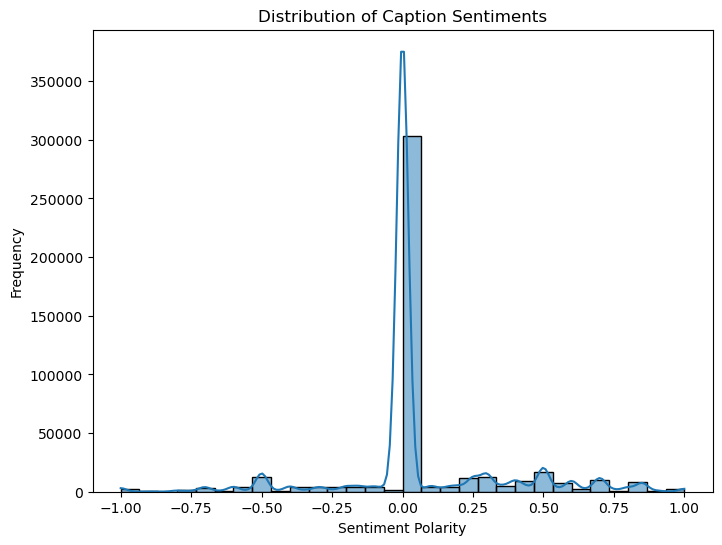

In [ ]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

artwork_data['Sentiment'] = artwork_data['painting_emotion'].apply(sentiment_analysis)
plt.figure(figsize=(8, 6))
sns.histplot(artwork_data['Sentiment'], bins=30, kde=True)
plt.title("Distribution of Caption Sentiments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

#### Sentimental Score

In [ ]:
# 加载情感词汇词典
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiment_analysis(text):
    """
    对文本进行情感分析
    参数：
        text (str)：待分析的文本
    返回值：
        sentiment_score (float)：情感得分，范围从 -1（消极）到 1（积极）
    """
    # 分词
    words = word_tokenize(text.lower())

    # 统计文本中积极情感词、消极情感词和中立词的数量
    num_positive_words = sum(1 for word in words if word in positive_words)
    num_negative_words = sum(1 for word in words if word in negative_words)
    num_neutral_words = len(words) - num_positive_words - num_negative_words

    # 计算情感得分
    total_words = num_positive_words + num_negative_words + num_neutral_words
    sentiment_score = ((num_positive_words - num_negative_words) + num_neutral_words * 0.5) / max(1, total_words)

    return sentiment_score

# 对每一行的文本数据应用情感分析函数
artwork_data['sentiment_score'] = artwork_data['painting_emotion'].apply(lambda x: sentiment_analysis(x))

artwork_data.to_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\processed_artwork_data3.csv",index=False)

In [ ]:
artwork_data = pd.read_csv("E:\\Project and Dissertation in Data Science\\dataset\\artemis_official_data\\processed_artwork_data3.csv")

In [ ]:
artwork_data

,art_style,painting,utterance,painting_emotion,sentiment_score
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"She seems very happy in the picture, and you w...","happy, smile",0.833333
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,This woman has really knotty hands which makes...,sadness,-1.000000
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"When looking at this woman, I am filled with c...",emotionless,0.500000
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,"A woman looking at ease, peaceful, and satisfi...","contentment,ease, satisfy, peaceful",0.785714
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,She looks like a lady from that past that migh...,"awe,hard, tired",0.000000
...,...,...,...,...,...
443657,Cubism,willi-baumeister_machine-man-with-spiral-turn-...,The interlocking mechanical shapes fitting tog...,creative,1.000000
443658,Cubism,gino-severini_a-dancer-1,the collection and collage of different colors...,"awe,beautiful",0.833333
443659,Romanticism,ivan-aivazovsky_sea-at-night-1861,The peaceful reflections of the moonlight on t...,"awe,sharply, peaceful",0.400000
443660,Romanticism,ivan-aivazovsky_sea-at-night-1861,I can imagine the sailors resting this peacefu...,"excitement,peaceful",0.833333


### Key Words Analysis

#### Audio Dataset

<Figure size 1000x600 with 0 Axes>

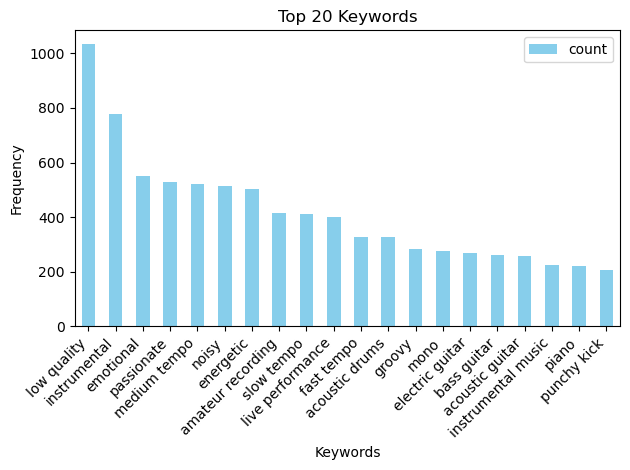

In [ ]:
keywords = []
for row in audio_data['topic_words']:
    keywords.extend(row.strip('[]').replace("'", "").split(', '))

# 3. 关键词统计
keyword_counts = Counter(keywords)

# 4. 类型标签统计
type_label_counts = Counter(type_labels)

# 5. 可视化分析
# 关键词柱状图
plt.figure(figsize=(10, 6))
keyword_counts_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['count'])
keyword_counts_df.sort_values(by='count', ascending=False, inplace=True)
keyword_counts_df[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

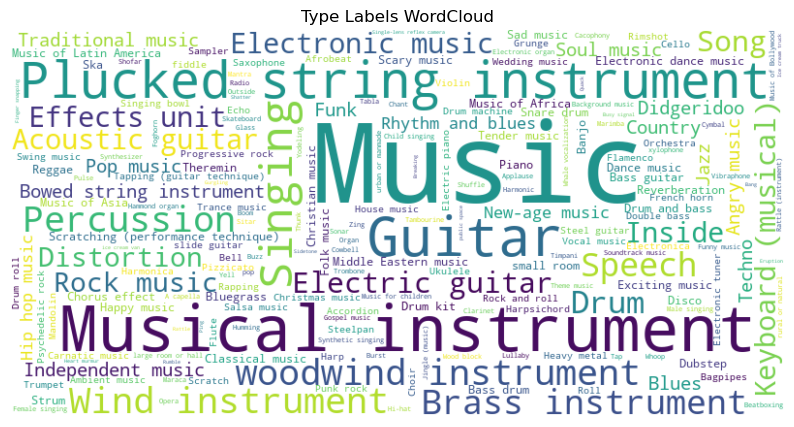

In [ ]:
# 处理类型标签列
type_labels = []
for row in audio_data['audioset_label']:
    type_labels.extend(row.split(','))

keyword_counts = Counter(keywords)

# 4. 类型标签统计
type_label_counts = Counter(type_labels)

# 5. 生成类型标签词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(type_label_counts)

# 6. 可视化分析
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Type Labels WordCloud')
plt.axis('off')
plt.show()